In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

from numpy.linalg import inv
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse

In [ ]:
''' 
    Returns the Sine of the input
'''
def sin(x):
    return np.sin(x*(np.pi/180))


'''
    Returns the Cosine of the input
'''
def cos(x):
    return np.cos(x*(np.pi/180))

'''
    Returns the Mean of the given input.
'''
def mean(x):
    return np.mean(x)



def kernel_1(r, Lat, Long):
    lat_0 = mean(Lat)
    long_0 = mean(Long)
    output = np.array([])
    for i in range(0,len(Lat)):
        lat = Lat[i]
        long = Long[i]
        output = np.append(output,(-1*r*sin(lat)*cos(long)))
        output = np.append(output,(-1*r*sin(lat)*sin(long)))
        output = np.append(output,(r*cos(lat)))
        output = np.append(output,(r*(long-long_0)*cos(lat)))
        output = np.append(output,(r*(lat-lat_0)))
        output = np.append(output,0)

        t1 = r*r*cos(lat)*cos(lat)*(long-long_0)*(long-long_0)
        t2 = r*r*(lat-lat_0)*(lat-lat_0)
        t3 = r*r*cos(lat)*(long-long_0)*(lat-lat_0)
        output = np.append(output,t1)
        output = np.append(output,t2)
        output = np.append(output,t3)
        output = np.append(output,0)
        output = np.append(output,0)
        output = np.append(output,0)
        
    output = output.reshape(len(Lat),12)
    return output

def kernel_2(r, lat, long):
    output = np.array([])
    lat_0 = mean(Lat)
    long_0 = mean(Long)
    output = np.array([])
    for i in range(0,len(Lat)):
        lat = Lat[i]
        long = Long[i]
        output = np.append(output,(r*sin(long)))
        output = np.append(output,(-1*r*cos(long)))
        output = np.append(output,0)
        output = np.append(output,0)
        output = np.append(output,(r*(long-long_0)*cos(lat)))
        output = np.append(output,(r*(lat-lat_0)))

        t1 = r*r*cos(lat)*cos(lat)*(long-long_0)*(long-long_0)
        t2 = r*r*(lat-lat_0)*(lat-lat_0)
        t3 = r*r*cos(lat)*(long-long_0)*(lat-lat_0)

        output = np.append(output,0)
        output = np.append(output,0)
        output = np.append(output,0)
        output = np.append(output,t1)
        output = np.append(output,t2)
        output = np.append(output,t3)
    
    output = output.reshape(len(Lat),12)
    return output



def Data_kernel(r,Lat, Long):
    n = len(Lat)
    G = np.empty((2*n,12))
    k1 = kernel_1(r,Lat, Long)
    k2 = kernel_2(r,Lat, Long)
    for i in range(0,n):
        G[2*i] = k1[i]
        G[2*i+1] = k2[i]
    return G


def velocity(V_e,V_n):
    V = np.array([])
    for i in range(0,len(V_e)):
        temp1 = float(V_e[i])
        temp2 = float(V_n[i])
        V = np.append(V,temp1)
        V = np.append(V,temp2)
    return V

def score(true_value,predicted_value):
    print("Mean Squared Error: ", mse(true_value,predicted_value))
    print("R2 Score: ",r2(true_value,predicted_value))
    return 0

def strain_e(A_0,B_0,C_0,e_1,e_2,e_3,l_1,l_2,l_3,x,y):
    output = A_0+e_1*x+e_3*y
    return output


def strain_n(A_0,B_0,C_0,e_1,e_2,e_3,l_1,l_2,l_3,x,y):
    output = C_0+l_2*y+l_3*x
    return output


def strain_en(A_0,B_0,C_0,e_1,e_2,e_3,l_1,l_2,l_3,x,y):
    t1 = B_0+e_2*y+e_3*x
    t2 = B_0+l_1*x+l_3*y
    output = (t1+t2)/2
    return output

def model_params(reg_coef):
    # Model Parameters

    w_x = reg_coef[0]
    w_y = reg_coef[1]
    w_z = reg_coef[2]
    A_0 = reg_coef[3]
    B_0 = reg_coef[4]
    C_0 = reg_coef[5]
    e_1 = reg_coef[6]
    e_2 = reg_coef[7]
    e_3 = reg_coef[8]
    l_1 = reg_coef[9]
    l_2 = reg_coef[10]
    l_3 = reg_coef[11]
    
    # Euler Vector
    print("X-Component of Euler Vector: ",w_x)
    print("Y-Component of Euler Vector: ",w_y)
    print("Z-Component of Euler Vector: ",w_z,"\n")
    
    #Strain Parameters
    print("North Component of Strain Parameter: ",A_0)
    print("North-East Component of Strain Parameter: ",B_0)
    print("East Component of Strain Parameter: ",C_0,"\n")
    
    # Strain Parameters due to Variable Strain
    print("E1-Component of Strain Parameter: ",e_1)
    print("E2-Component of Strain Parameter: ",e_2)
    print("E3-Component of Strain Parameter: ",e_3,"\n")
    
    print("L1-Component of Strain Parameter: ",l_1)
    print("L2-Component of Strain Parameter: ",l_2)
    print("L3-Component of Strain Parameter: ",l_3)
    
    return "Model Parameters"

In [ ]:
data = pd.read_csv('velocity.csv')
site = data.iloc[0:81,6]
Long = data.iloc[0:81,5]
V_e = data.iloc[0:81,3]
Lat = data.iloc[0:81,2]
V_n = data.iloc[0:81,0]

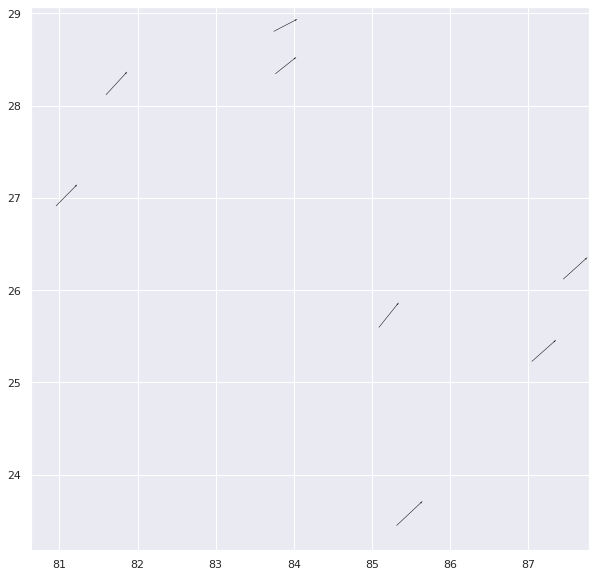

In [ ]:
plt.figure(figsize = (10,10))
plt.quiver(Long,Lat,V_e,V_n,width=0.001)
plt.show()

In [ ]:
V = velocity(V_e,V_n)/1e6
for i in range(0,len(V)):
    temp = V[i]
    V[i] = float(temp)
    

In [ ]:
r = 6371 
G = Data_kernel(r,Lat, Long)

In [ ]:
# Inversion
param = inv(G.T @ G)@ G.T @ V
V_pred = G @ param

In [ ]:
score(V,V_pred)

Mean Squared Error:  3.430503725027062e-12
R2 Score:  0.8851430561077084


0

In [ ]:
model_params(param)

X-Component of Euler Vector:  4.895687462019434e-09
Y-Component of Euler Vector:  -1.0672236660885387e-08
Z-Component of Euler Vector:  4.4933493170142654e-10 

North Component of Strain Parameter:  1.465934360745206e-10
North-East Component of Strain Parameter:  -6.725467235844596e-11
East Component of Strain Parameter:  -7.078913473400914e-10 

E1-Component of Strain Parameter:  2.019156622492308e-14
E2-Component of Strain Parameter:  3.3350011823410806e-14
E3-Component of Strain Parameter:  8.978413124435998e-15 

L1-Component of Strain Parameter:  -1.4498823931064066e-14
L2-Component of Strain Parameter:  -4.043732821155021e-14
L3-Component of Strain Parameter:  -5.29357287923817e-14


'Model Parameters'

# Optimisation


In [ ]:
count = 0
while(count == 0):
    count = 1
    V = pd.DataFrame(V)
    V = V.iloc[:,0]
    V_pred = pd.DataFrame(V_pred)
    V_pred = V_pred.iloc[:,0]
    error = V - V_pred
    #error = pd.DataFrame(error)
    # 2-Sigma Tolerance
    tol_1 = (np.mean(error)+2*np.std(error))
    tol_2 = (np.mean(error)-2*np.std(error))
    
    max_error = error.max()

    if((max_error < tol_2) or (max_error > tol_1)):
        count = 0
        # To find the index of the outlier
        for i in range(0,len(error)):
            temp = error[i]
            if(max_error == temp):
                max_idx = i
        if(max_idx%2 == 0):
            idx = max_idx
            V.pop(idx)
            V.pop(idx+1)
            Lat.pop(int(idx/2))
            Long.pop(int(idx/2))
            site.pop(int(idx/2))
            
        if(max_idx%2 == 1):
            idx = max_idx
            V.pop(idx)
            V.pop(idx-1)
            t=int(np.floor(idx/2))
            Lat.pop(t)
            Long.pop(t)
            site.pop(t)
            
        V = pd.DataFrame(V)
        V = pd.DataFrame.reset_index(V)
        V = V.iloc[:,1]
        Lat = pd.DataFrame(Lat)
        Lat = pd.DataFrame.reset_index(Lat)
        Lat = Lat.iloc[:,1]
        Long = pd.DataFrame(Long)
        Long = pd.DataFrame.reset_index(Long)
        Long = Long.iloc[:,1]
        site = pd.DataFrame(site)
        site = pd.DataFrame.reset_index(site)
        site = site.iloc[:,1]
        
        #Create Design Matrix
        r = 6371
        G = Data_kernel(r,Long,Lat)
        
        # Run Regression & Get Prediction
        param = inv(G.T @ G)@ G.T @ V
        V_pred = G @ param
        
        

In [ ]:
param = inv(G.T @ G)@ G.T @ V
V_pred = G @ param

In [ ]:
score(V,V_pred)

Mean Squared Error:  3.430503725027062e-12
R2 Score:  0.8851430561077084


0

In [ ]:
model_params(param)

X-Component of Euler Vector:  4.895687462019434e-09
Y-Component of Euler Vector:  -1.0672236660885387e-08
Z-Component of Euler Vector:  4.4933493170142654e-10 

North Component of Strain Parameter:  1.465934360745206e-10
North-East Component of Strain Parameter:  -6.725467235844596e-11
East Component of Strain Parameter:  -7.078913473400914e-10 

E1-Component of Strain Parameter:  2.019156622492308e-14
E2-Component of Strain Parameter:  3.3350011823410806e-14
E3-Component of Strain Parameter:  8.978413124435998e-15 

L1-Component of Strain Parameter:  -1.4498823931064066e-14
L2-Component of Strain Parameter:  -4.043732821155021e-14
L3-Component of Strain Parameter:  -5.29357287923817e-14


'Model Parameters'

In [ ]:
V_e = np.empty(8)
V_n = np.empty(8)
for i in range(0,8):
    V_e[i] = V[2*i]
    V_n[i] = V[2*i+1]  


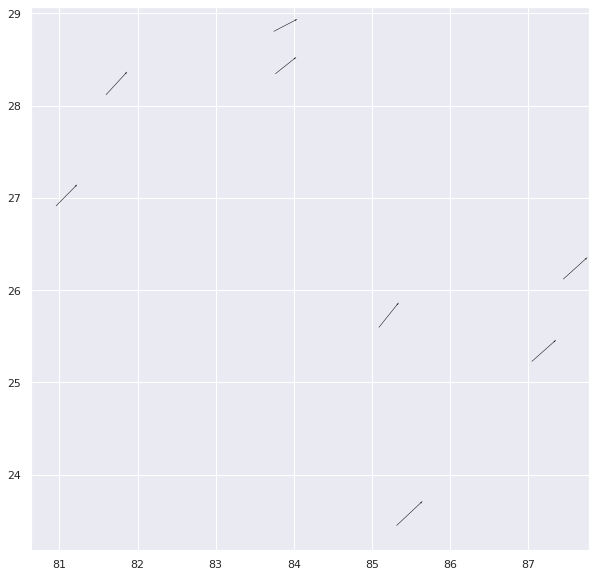

In [ ]:
plt.figure(figsize = (10,10))
plt.quiver(Long,Lat,V_e,V_n,width=0.001)
plt.show()

In [ ]:
score(V,V_pred)

Mean Squared Error:  3.430503725027062e-12
R2 Score:  0.8851430561077084


0

In [ ]:
w_x = param[0]
w_y = param[1]
w_z = param[2]
A_0 = param[3]
B_0 = param[4]
C_0 = param[5]
e_1 = param[6]
e_2 = param[7]
e_3 = param[8]
l_1 = param[9]
l_2 = param[10]
l_3 = param[11]

r = 6371 #in Km
lat_0 = mean(Lat)
long_0 = mean(Long)
x = r*cos(Lat)*(Long-long_0)
y = r*(Lat-lat_0)

In [ ]:
strain_east=strain_e(A_0,B_0,C_0,e_1,e_2,e_3,l_1,l_2,l_3,x,y)*1e9

strain_north=strain_n(A_0,B_0,C_0,e_1,e_2,e_3,l_1,l_2,l_3,x,y)*1e9

strain_east_north=strain_en(A_0,B_0,C_0,e_1,e_2,e_3,l_1,l_2,l_3,x,y)*1e9

dilation= strain_north+strain_east

shear_strain_rate = np.sqrt(strain_east_north**2+((strain_east-strain_north)**2)/4)

angle_1 = (np.arctan((2*strain_east_north)/(strain_east-strain_north))/2)*(180/np.pi) + 45
angle_2 = (np.arctan((2*strain_east_north)/(strain_east-strain_north))/2)*(180/np.pi) - 45
#tan_angle = np.tan((np.pi*angle)/180)

azimuth = 90-(np.arctan(V_n/V_e)*(180/np.pi))

scaled_mag = np.sqrt(V_e**2+V_n**2)/20 #Scaled by 20

In [ ]:
shear_strain_rate #in 10^-9

0    1.004043
1    0.780301
2    0.606079
3    0.680188
4    0.230940
5    0.157099
6    0.425256
7    0.177625
dtype: float64

In [ ]:
strain_east = pd.DataFrame(strain_east)

strain_north = pd.DataFrame(strain_north)

strain_east_north = pd.DataFrame(strain_east_north)

dilation = pd.DataFrame(dilation)

shear_strain_rate = pd.DataFrame(shear_strain_rate)

azimuth = pd.DataFrame(azimuth)

scaled_mag = pd.DataFrame(scaled_mag)

In [ ]:
site_loc = pd.concat([Long, Lat],axis=1)
site_loc.to_csv(r'site_loc.csv')

site_vel = pd.concat([Long, Lat, azimuth, scaled_mag],axis=1)
site_vel.to_csv(r'site_vel.csv')

site_strain_east = pd.concat([Long, Lat, strain_east],axis=1)
site_strain_east.to_csv(r'site_strain_east.csv')

site_strain_north = pd.concat([Long, Lat, strain_north],axis=1)
site_strain_north.to_csv(r'site_strain_north.csv')

site_strain_east_north = pd.concat([Long, Lat, strain_east_north],axis=1)
site_strain_east_north.to_csv(r'site_strain_east_north.csv')

site_shear_strain = pd.concat([Long, Lat, shear_strain_rate],axis=1)
site_shear_strain.to_csv(r'site_shear_strain.csv')

site_dilation = pd.concat([Long, Lat, dilation],axis=1)
site_dilation.to_csv(r'site_dilation.csv')

In [ ]:
Long_ = np.abs(np.random.rand(100))*20 + 75
Lat_ = np.abs(np.random.rand(100))*20 + 20
max(Lat_)

39.8279740835131

In [ ]:
r = 6371 #in Km
lat_0 = mean(Lat_)
long_0 = mean(Long_)
x = r*cos(Lat_)*(Long_-long_0)
y = r*(Lat_-lat_0)

strain_east_=strain_e(A_0,B_0,C_0,e_1,e_2,e_3,l_1,l_2,l_3,x,y)*1e9

strain_north_=strain_n(A_0,B_0,C_0,e_1,e_2,e_3,l_1,l_2,l_3,x,y)*1e9

strain_east_north_=strain_en(A_0,B_0,C_0,e_1,e_2,e_3,l_1,l_2,l_3,x,y)*1e9

dilation_= strain_north_+strain_east_

shear_strain_rate_ = np.sqrt(strain_east_north_**2+((strain_east_-strain_north_)**2)/4)

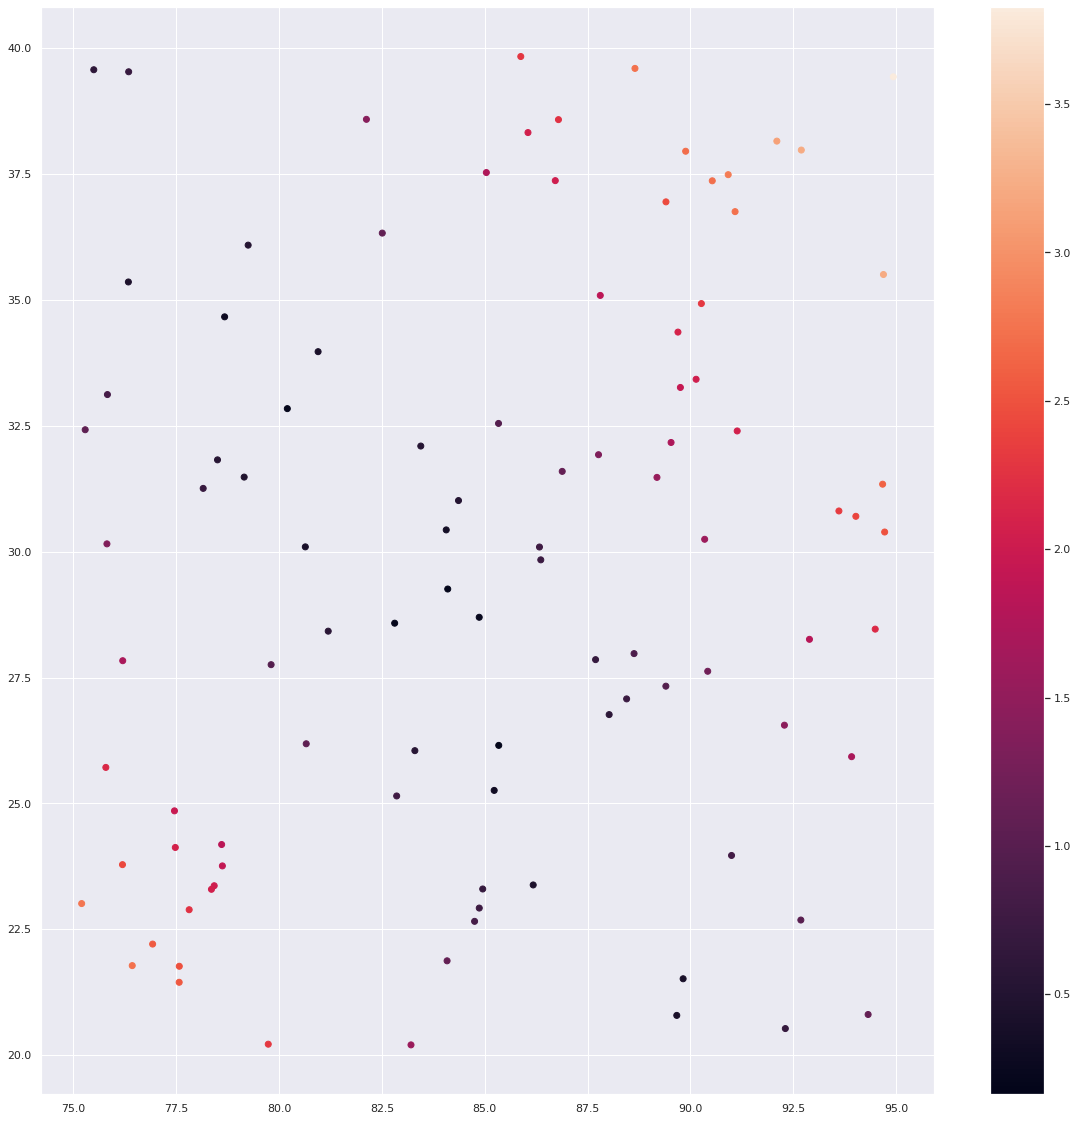

In [ ]:
plt.figure(figsize=(20,20))
ax = plt.scatter(Long_,Lat_,c = shear_strain_rate_)
ax = plt.colorbar()
plt.show()

In [ ]:
# Plot the contour

h=0.02
Lat_min, Lat_max = 22.5,30 #min(Lat_),max(Lat_)
Long_min, Long_max =80,88 # min(Long_),max(Long_)
Long_Long,Lat_Lat = np.meshgrid(np.arange(Long_min,Long_max,h),np.arange(Lat_min,Lat_max,h))

r = 6371 #in Km
lat_0 = mean(Lat_Lat.ravel())
long_0 = mean(Long_Long.ravel())
x = r*cos(Lat_Lat.ravel())*(Long_Long.ravel()-long_0)
y = r*(Lat_Lat.ravel()-lat_0)

strain_east_=strain_e(A_0,B_0,C_0,e_1,e_2,e_3,l_1,l_2,l_3,x,y)*1e9

strain_north_=strain_n(A_0,B_0,C_0,e_1,e_2,e_3,l_1,l_2,l_3,x,y)*1e9

strain_east_north_=strain_en(A_0,B_0,C_0,e_1,e_2,e_3,l_1,l_2,l_3,x,y)*1e9

dilation_= strain_north_+strain_east_
dilation_ = dilation_.reshape(Lat_Lat.shape)
shear_strain_rate_ = np.sqrt(strain_east_north_**2+((strain_east_-strain_north_)**2)/4)
shear_strain_rate_ = shear_strain_rate_.reshape(Lat_Lat.shape)

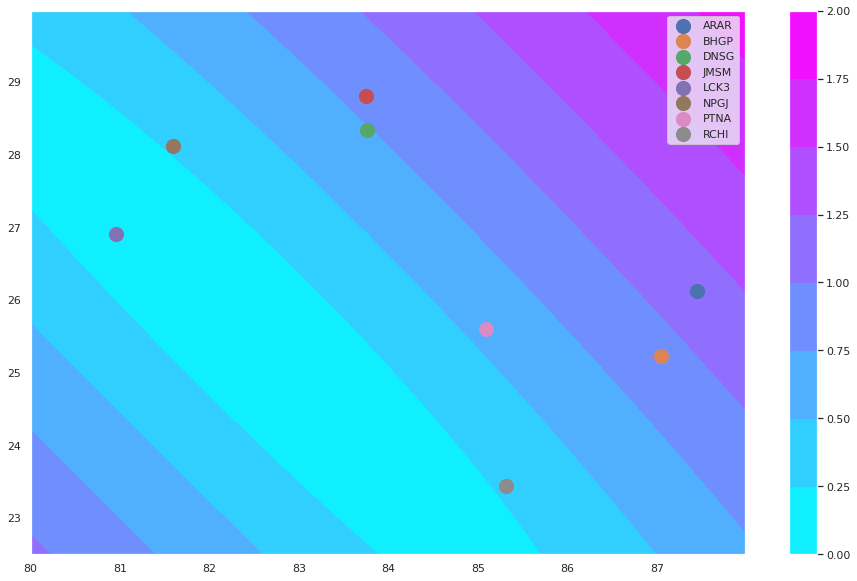

In [ ]:
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(Long_Long,Lat_Lat,shear_strain_rate_,cmap = 'cool')
ax= plt.colorbar()
for i in range(0,len(Lat)):
    plt.scatter(Long[i],Lat[i],label=site[i],s=200)
plt.legend()
plt.show()